In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers

In [2]:
df=pd.read_csv("./diabetes.csv")

In [3]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
x=df.iloc[:,0:8];
y=df["Outcome"]
print("X shape: ", x.shape)
print("y shape: ", y.shape)

X shape:  (768, 8)
y shape:  (768,)


In [12]:
#standardization
scaler=StandardScaler();
x_scaled = scaler.fit_transform(x)

In [48]:
# splitting into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (537, 8)
X_test shape:  (231, 8)
y_train shape:  (537,)
y_test shape:  (231,)


In [55]:
#define model
model=models.Sequential();
model.add(layers.Dense(12,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(2,activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [56]:
#model.compile
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [57]:
#train model
history=model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
17/17 [==============================] - 1s 14ms/step - loss: 0.6825 - accuracy: 0.6741 - val_loss: 0.6836 - val_accuracy: 0.5974
Epoch 2/30
17/17 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.6741 - val_loss: 0.6662 - val_accuracy: 0.5974
Epoch 3/30
17/17 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.6741 - val_loss: 0.6466 - val_accuracy: 0.5974
Epoch 4/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6215 - accuracy: 0.6741 - val_loss: 0.6299 - val_accuracy: 0.5974
Epoch 5/30
17/17 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.6741 - val_loss: 0.6169 - val_accuracy: 0.5974
Epoch 6/30
17/17 [==============================] - 0s 6ms/step - loss: 0.5825 - accuracy: 0.6741 - val_loss: 0.6073 - val_accuracy: 0.5974
Epoch 7/30
17/17 [==============================] - 0s 5ms/step - loss: 0.5676 - accuracy: 0.6741 - val_loss: 0.5994 - val_accuracy: 0.5974
Epoch 8/30
17/17 [=

In [58]:
# evaluate model
result = model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7100


Text(0, 0.5, 'Accuracy')

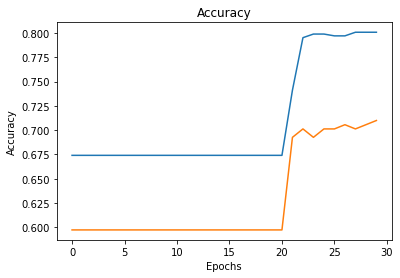

In [59]:
# plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

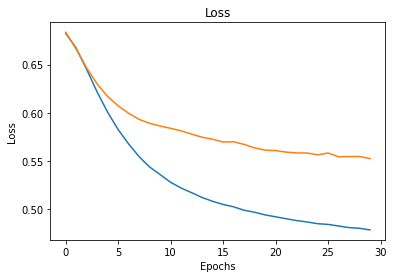

In [60]:
# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
